In [52]:
import pandas as pd
import glob
import re
import string

import warnings
warnings.filterwarnings("ignore")

In [53]:
kb_df = pd.read_csv("reviews_lower.csv")

In [54]:
kb_df.head()

,names,reviews,ratings
0,Augenklinik - Dr. Hoffmann,meine laser op grauer star hat super geklappt ...,6
1,Augenklinik - Dr. Hoffmann,bin sehr zufrieden gewesen mit der klinik und ...,6
2,Augenklinik - Dr. Hoffmann,komptentes ärzteteam strickte einhaltung der c...,6
3,Augenklinik - Dr. Hoffmann,ich komme seit einen halben jahr mit meiner be...,6
4,Augenklinik - Dr. Hoffmann,ich war anfang november 2019 zur augenop graue...,6


In [55]:
kb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 3 columns):
names      2061 non-null object
reviews    2061 non-null object
ratings    2061 non-null int64
dtypes: int64(1), object(2)
memory usage: 48.4+ KB


In [56]:
kb_df.reset_index(drop=True, inplace=True) #bunu neden yaptik?

In [57]:
strin = kb_df['reviews'][0]
strin

'meine laser op grauer star hat super geklappt alles lief wie am schnürchen ab danke dafür danke auch an den neuen küchenchef für das tolle brötchenwar eine überraschung mit dem shuttleservice war ich auch sehr zufrieden sehr freundliche fahrerrinnen also die klinik ist absolut weiter zu empfehlen'

## Sentimenanalyse

In [58]:
import textblob # Sentiment Analyse
from textblob_de import TextBlobDE
from textblob import TextBlob

In [59]:
kb_df["reviews"].head()

0    meine laser op grauer star hat super geklappt ...
1    bin sehr zufrieden gewesen mit der klinik und ...
2    komptentes ärzteteam strickte einhaltung der c...
3    ich komme seit einen halben jahr mit meiner be...
4    ich war anfang november 2019 zur augenop graue...
Name: reviews, dtype: object

In [60]:
'''Bei diesen Funktionen mit TextBlob werden wir 'Polaritywerten' von allen Kommentaren  erhalten.  '''

def senti_kb(x):
    return TextBlobDE(x).sentiment.polarity # TextBlobDE ist für deutsche Texte geignet.

In [61]:
kb_df['Senti_Score'] = kb_df['reviews'].apply(senti_kb)

In [62]:
kb_df.head()

,names,reviews,ratings,Senti_Score
0,Augenklinik - Dr. Hoffmann,meine laser op grauer star hat super geklappt ...,6,0.600000
1,Augenklinik - Dr. Hoffmann,bin sehr zufrieden gewesen mit der klinik und ...,6,1.000000
2,Augenklinik - Dr. Hoffmann,komptentes ärzteteam strickte einhaltung der c...,6,0.000000
3,Augenklinik - Dr. Hoffmann,ich komme seit einen halben jahr mit meiner be...,6,0.333333
4,Augenklinik - Dr. Hoffmann,ich war anfang november 2019 zur augenop graue...,6,0.600000


In [63]:
A = pd.DataFrame(kb_df["names"].value_counts())

In [64]:
A.reset_index(inplace = True)

In [65]:
A

,index,names
0,Sana Klinikum Hameln-Pyrmont,462
1,DRK-Clementinenhaus,245
2,Asklepios Fachklinikum Tiefenbrunn,204
3,HELIOS Klinikum Hildesheim GmbH,199
4,DIAKOVERE Friederikenstift,175
5,DIAKOVERE Annastift,164
6,HEH Herzogin Elisabeth Hospital,119
7,KRH Klinikum Großburgwedel,99
8,Asklepios Fachklinikum Göttingen,85
9,Krankenhaus Lindenbrunn,80


In [85]:
kb = kb_df.merge(A, how='left', left_on='names', right_on='index')
kb

,names_x,reviews,ratings,Senti_Score,index,names_y
0,Augenklinik - Dr. Hoffmann,meine laser op grauer star hat super geklappt ...,6,0.600000,Augenklinik - Dr. Hoffmann,23
1,Augenklinik - Dr. Hoffmann,bin sehr zufrieden gewesen mit der klinik und ...,6,1.000000,Augenklinik - Dr. Hoffmann,23
2,Augenklinik - Dr. Hoffmann,komptentes ärzteteam strickte einhaltung der c...,6,0.000000,Augenklinik - Dr. Hoffmann,23
3,Augenklinik - Dr. Hoffmann,ich komme seit einen halben jahr mit meiner be...,6,0.333333,Augenklinik - Dr. Hoffmann,23
4,Augenklinik - Dr. Hoffmann,ich war anfang november 2019 zur augenop graue...,6,0.600000,Augenklinik - Dr. Hoffmann,23
5,Augenklinik - Dr. Hoffmann,trotz extrem hoher patientenfrequenz erfolgte ...,6,1.000000,Augenklinik - Dr. Hoffmann,23
6,Augenklinik - Dr. Hoffmann,diese klinik ist nur zu empfehlen das gesamte ...,6,0.233333,Augenklinik - Dr. Hoffmann,23
7,Augenklinik - Dr. Hoffmann,sehr nettes und kompetentens personal kurze wa...,6,0.880000,Augenklinik - Dr. Hoffmann,23
8,Augenklinik - Dr. Hoffmann,freundliches personal keine lange wartezeit ko...,6,1.000000,Augenklinik - Dr. Hoffmann,23
9,Augenklinik - Dr. Hoffmann,dass es bei einer offenen sprechstunde einer a...,2,0.241176,Augenklinik - Dr. Hoffmann,23


In [102]:
kb_ml = kb[['names_x','names_y','ratings','Senti_Score']]
kb_ml.head()

,names_x,names_y,ratings,Senti_Score
0,Augenklinik - Dr. Hoffmann,23,6,0.600000
1,Augenklinik - Dr. Hoffmann,23,6,1.000000
2,Augenklinik - Dr. Hoffmann,23,6,0.000000
3,Augenklinik - Dr. Hoffmann,23,6,0.333333
4,Augenklinik - Dr. Hoffmann,23,6,0.600000


In [106]:
cluster_df = kb_ml.groupby('names_x')['Senti_Score','names_y', 'ratings'].mean()

In [107]:
cluster_df

,Senti_Score,names_y,ratings
names_x,,,
Asklepios Fachklinikum Göttingen,0.003170,85.0,1.717647
Asklepios Fachklinikum Tiefenbrunn,0.136224,204.0,3.107843
Augenklinik - Dr. Hoffmann,0.408597,23.0,4.260870
DIAKOVERE Annastift,0.232791,164.0,4.426829
DIAKOVERE Friederikenstift,0.091014,175.0,3.051429
DRK-Clementinenhaus,0.324972,245.0,4.383673
HEH Herzogin Elisabeth Hospital,0.376336,119.0,4.689076
HELIOS Klinikum Hildesheim GmbH,0.155400,199.0,3.346734
KRH Klinikum Großburgwedel,0.166167,99.0,3.575758


In [122]:
cluster_df['kz_Senti'] = cluster_df['Senti_Score'] * (cluster_df['names_y'] /cluster_df['names_y'].max())

In [123]:
cluster_df

,Senti_Score,names_y,ratings,Clusters,Klinify_Score,kz_Senti
names_x,,,,,,
Asklepios Fachklinikum Göttingen,0.003170,85.0,1.717647,0,Sehr Gut,0.000583
Asklepios Fachklinikum Tiefenbrunn,0.136224,204.0,3.107843,2,Ausreichend,0.060151
Augenklinik - Dr. Hoffmann,0.408597,23.0,4.260870,3,Mangelhaft,0.020341
DIAKOVERE Annastift,0.232791,164.0,4.426829,2,Ausreichend,0.082636
DIAKOVERE Friederikenstift,0.091014,175.0,3.051429,2,Ausreichend,0.034475
DRK-Clementinenhaus,0.324972,245.0,4.383673,2,Ausreichend,0.172333
HEH Herzogin Elisabeth Hospital,0.376336,119.0,4.689076,0,Sehr Gut,0.096935
HELIOS Klinikum Hildesheim GmbH,0.155400,199.0,3.346734,2,Ausreichend,0.066936
KRH Klinikum Großburgwedel,0.166167,99.0,3.575758,0,Sehr Gut,0.035607


# Machine Learning

### K-Means Clustering

In [124]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

In [125]:
clustering = cluster_df[['ratings','names_y']].reset_index(drop=True)
clustering

,ratings,names_y
0,1.717647,85.0
1,3.107843,204.0
2,4.260870,23.0
3,4.426829,164.0
4,3.051429,175.0
5,4.383673,245.0
6,4.689076,119.0
7,3.346734,199.0
8,3.575758,99.0
9,3.240000,50.0


In [126]:
from sklearn.preprocessing import StandardScaler
X = clustering.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.47761312],
       [ 0.60704263],
       [-1.04272787],
       [ 0.24245246],
       [ 0.34271476],
       [ 0.98074755],
       [-0.16771148],
       [ 0.56146886],
       [-0.35000656],
       [-0.79662951],
       [-0.52318689],
       [-0.61433443],
       [-1.17033443],
       [ 2.9586492 ],
       [-0.55053115]])

### Modeling

In [127]:
!pip install yellowbrick

In [128]:
from yellowbrick.cluster import KElbowVisualizer

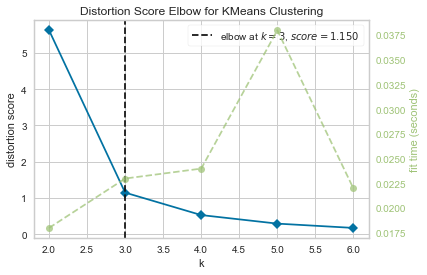

In [131]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,7))
visu.fit(Clus_dataSet)
visu.poof();

In [132]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[3 0 1 0 0 0 3 0 3 1 3 3 1 2 3]


In [ ]:
[0 1 0 1 1 1 0 1 0 0 0 0 0 2 0]

In [133]:
cluster_df["Clusters"] = labels

In [134]:
cluster_df

,Senti_Score,names_y,ratings,Clusters,Klinify_Score,kz_Senti
names_x,,,,,,
Asklepios Fachklinikum Göttingen,0.003170,85.0,1.717647,3,Sehr Gut,0.000583
Asklepios Fachklinikum Tiefenbrunn,0.136224,204.0,3.107843,0,Ausreichend,0.060151
Augenklinik - Dr. Hoffmann,0.408597,23.0,4.260870,1,Mangelhaft,0.020341
DIAKOVERE Annastift,0.232791,164.0,4.426829,0,Ausreichend,0.082636
DIAKOVERE Friederikenstift,0.091014,175.0,3.051429,0,Ausreichend,0.034475
DRK-Clementinenhaus,0.324972,245.0,4.383673,0,Ausreichend,0.172333
HEH Herzogin Elisabeth Hospital,0.376336,119.0,4.689076,3,Sehr Gut,0.096935
HELIOS Klinikum Hildesheim GmbH,0.155400,199.0,3.346734,0,Ausreichend,0.066936
KRH Klinikum Großburgwedel,0.166167,99.0,3.575758,3,Sehr Gut,0.035607


In [135]:
cluster_df['Klinify_Score'] = cluster_df['Clusters']


cluster_df['Klinify_Score'].replace(0, 'Sehr Gut', inplace=True)
cluster_df['Klinify_Score'].replace(1, 'Gut', inplace=True)
cluster_df['Klinify_Score'].replace(2, 'Ausreichend', inplace=True)
cluster_df['Klinify_Score'].replace(3, 'Mangelhaft', inplace=True)

In [137]:
kb_ml_ergebnis = cluster_df[['ratings','kz_Senti','Klinify_Score']]
kb_ml_ergebnis

,ratings,kz_Senti,Klinify_Score
names_x,,,
Asklepios Fachklinikum Göttingen,1.717647,0.000583,Mangelhaft
Asklepios Fachklinikum Tiefenbrunn,3.107843,0.060151,Sehr Gut
Augenklinik - Dr. Hoffmann,4.260870,0.020341,Gut
DIAKOVERE Annastift,4.426829,0.082636,Sehr Gut
DIAKOVERE Friederikenstift,3.051429,0.034475,Sehr Gut
DRK-Clementinenhaus,4.383673,0.172333,Sehr Gut
HEH Herzogin Elisabeth Hospital,4.689076,0.096935,Mangelhaft
HELIOS Klinikum Hildesheim GmbH,3.346734,0.066936,Sehr Gut
KRH Klinikum Großburgwedel,3.575758,0.035607,Mangelhaft
